# PHXS 491_001: Observational Astronomy - Exam 3

### Due Tuesday, Dec 14, 2021
Remember to save your completed notebook as a PDF and upload both ipynb/PDF to Brightspace/D2L under Assignments.

Name: William Jardee

## Please use the "primt()" function (notice the "m") to print out your answers in magenta.  This makes grading easier.  You might need to "print to PDF" to get the colors to show up. Thanks to Katie for figuring this out.

In [1]:
def primt(*args):
    '''
    For any amount of arguments "*args", prints in magenta.
    '''
    magenta = "\x1B[38;5;201m"   # the color in ANSI code
    for el in args:  # for each argument
        magenta += " "+(str(el))  # add the argument to the string to be printed
    print(magenta)   #print!

In [2]:
import os
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.table import Table
import spec
%matplotlib inline

In [3]:
path = './data/'

## 1) Photometric Calibration
Use the standard star catalog data in ``r_all_chip1_night1.fits`` to calculate the zero-point, extinction term, and color term (in $g-r$) for the photometric calibration.

In [4]:
# Reading in
cat0 = Table(fits.getdata(path + 'r_all_chip1_night1.fits'))
g, = np.where(cat0['ERR']<0.04)
cat = cat0[g]

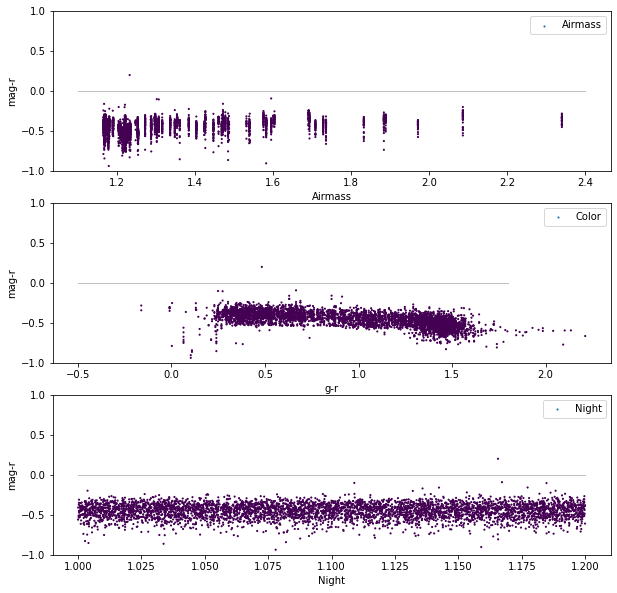

In [5]:
# initial data

fig,axs = plt.subplots(3,1,figsize=(10,10))
axs[0].scatter(cat['AIRMASS'],cat['MAG']-cat['R'],c=cat['NIGHT'],marker='.',s=5,label='Airmass')
axs[0].plot([1.1,2.4],[0,0],c='gray',linewidth=1,alpha=0.5)
axs[0].set_xlabel('Airmass')
axs[0].set_ylabel('mag-r')
axs[0].set_ylim(-1,1)
axs[0].legend()
axs[1].scatter(cat['G_R'],cat['MAG']-cat['R'],c=cat['NIGHT'],marker='.',s=5,label='Color')
axs[1].plot([-0.5,1.8],[0,0],c='gray',linewidth=1,alpha=0.5)
axs[1].set_xlabel('g-r')
axs[1].set_ylabel('mag-r')
axs[1].set_ylim(-1,1)
axs[1].legend()
rnd = np.random.rand(len(cat))*0.2
axs[2].scatter(cat['NIGHT']+rnd,cat['MAG']-cat['R'],c=cat['NIGHT'],marker='.',s=5,label='Night')
axs[2].plot([1.0,1.2],[0,0],c='gray',linewidth=1,alpha=0.5)
axs[2].set_xlabel('Night')
axs[2].set_ylabel('mag-r')
axs[2].set_ylim(-1,1)
axs[2].legend()
plt.show()

In [6]:
# extinction
extcoef = np.polyfit(cat['AIRMASS'],cat['MAG']-cat['R'],1)
extfn = np.poly1d(extcoef)
xext = np.linspace(1,2.3,100)
extmodel = extfn(xext)
extresid = (cat['MAG']-cat['R']) - extfn(cat['AIRMASS'])

#  color term
colcoef = np.polyfit(cat['G_R'],extresid,1)
colfn = np.poly1d(colcoef)
xcol = np.linspace(0,2.0,100)
colmodel = colfn(xcol)
colextresid = extresid - colfn(cat['G_R'])

# zero point
ntcolextresid = colextresid.copy()
med = np.median(colextresid)
ntcolextresid -= med

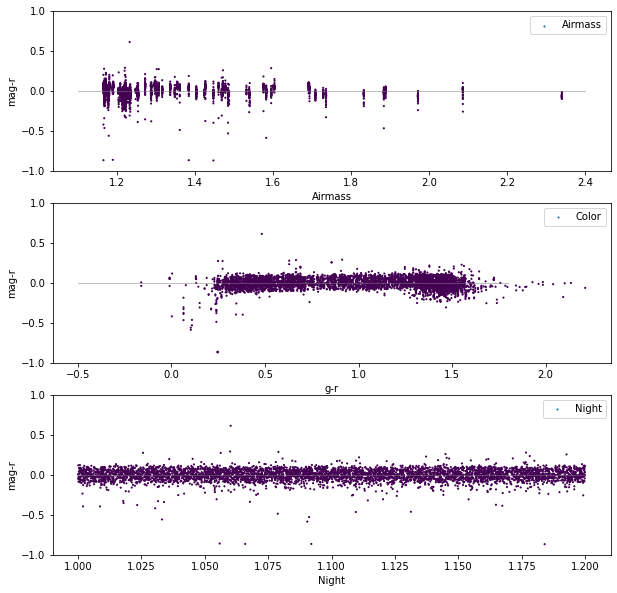

In [7]:
# processed data

fig,axs = plt.subplots(3,1,figsize=(10,10)) 
axs[0].scatter(cat['AIRMASS'],ntcolextresid,c=cat['NIGHT'],marker='.',s=5,label='Airmass')
axs[0].plot([1.1,2.4],[0,0],c='gray',linewidth=1,alpha=0.5)
axs[0].set_xlabel('Airmass')
axs[0].set_ylabel('mag-r')
axs[0].set_ylim(-1,1)
axs[0].legend()
axs[1].scatter(cat['G_R'],ntcolextresid,c=cat['NIGHT'],marker='.',s=5,label='Color')
axs[1].plot([-0.5,1.8],[0,0],c='gray',linewidth=1,alpha=0.5)
axs[1].set_xlabel('g-r')
axs[1].set_ylabel('mag-r')
axs[1].set_ylim(-1,1)
axs[1].legend()
rnd = np.random.rand(len(cat))*0.2
axs[2].scatter(cat['NIGHT']+rnd,ntcolextresid,c=cat['NIGHT'],marker='.',s=5,label='Night')
axs[2].plot([1.0,1.2],[0,0],c='gray',linewidth=1,alpha=0.5)
axs[2].set_xlabel('Night')
axs[2].set_ylabel('mag-r')
axs[2].set_ylim(-1,1)
axs[2].legend()
plt.show()

## 2) Spectral Resolution
Calculate the resolution using the projected slit width.

What is the resolution at 5000A set by a 0.5" slit on the IMACS f/4 channel with 600/5180A grating? <br>
scale = 0.11 arcsec/pixel


<img src="data\imacsf4_gratings_table.png" width=800 height=600 align="left"/>

In [8]:
R = 5180/(0.378*0.5/0.11)
primt(f"Resolution: {R:.2f}")

 Resolution: 3014.81


## 3) Diffraction grating order overlap
Calculate the reflected angles ($\beta$) for 3500A and 10,000A for the first three orders using the grating equation.  Assume that wavelengths shorter than 3500A and longer than 10,000A are blocked by other means (e.g., atmosphere, detector).  What second order wavelengths are uncontaminated (no overlap) by the first and third orders?
- Incidence angle, $\alpha$ = 5 deg
- 300 grooves/mm

In [9]:
import astropy.units as u

m = 3
d = 1/(300*(1/u.mm))
alpha = (5*u.deg).to(u.rad)

beta = lambda l : np.arcsin((m*l/d).decompose() -np.sin(alpha))

primt(f"{'3500 A:':10s} {beta(3500*u.Angstrom).to(u.deg):.2f}")
primt(f"{'10,000 A:':10s} {beta(10000*u.Angstrom).to(u.deg):.2f}")

 3500 A:    13.17 deg
 10,000 A:  54.37 deg


## 4) Equivalent widths
Measure the equivalent width (you can use ``voigtfit()`` function in the spec.py model or from ``bozepy.spec``) of two of the Balmer lines (at least one should be $H\beta$, 4861.34 A) for the ``specHD12707.fits`` spectrum.


In [10]:
from bozepy.spec import *

# Load the spectrum
flux,head = fits.getdata(path + 'specHD12707.fits',header=True)

cont,coef = continuum(flux,bin=20,norder=5)
flux = flux/cont
# The wavelength information is in the header
wave = np.arange(head['NAXIS1'])*head['CDELT1']+head['CRVAL1']
if head['DC-FLAG']==1:
    wave = 10**wave


In [11]:
def v_width(bounds, target, flux):
    initpar = [-0.5,wave[target],2.0,1.0,1.0,0.0]
    bnds = ([-1.0,initpar[1]-5,0.1,0.1,0.5,-0.5], [0.0,initpar[1]+5,20,20,1.5,0.5])

    vpars,vcov = voigtfit(wave[bounds[0]:bounds[1]], flux[bounds[0]:bounds[1]],initpar)
    vmodel = voigt(wave[bounds[0]:bounds[1]],*vpars)
    
    fig = plt.figure(figsize=(10,6))
    x = np.arange(len(flux))
    plt.plot(x,flux,label='Data')
    plt.plot(x[bounds[0]:bounds[1]],vmodel,label='Voigt')
    # plt.hlines(365000, 470, 520, color = 'black')
    plt.xlim(bounds[0], bounds[1])
    # plt.ylim(0.2,1.3)
    plt.legend()
    plt.show()

    return(voigtarea(vpars))

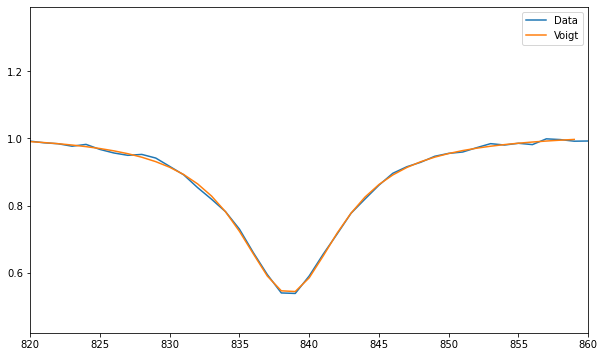

 Equivalent width for H alpha:  10.60


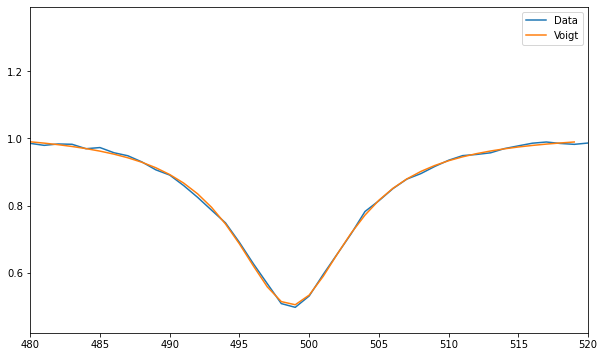

 Equivalent width for H bet:    11.66


In [12]:
# H alpha
alph = v_width((820, 860), 840, flux)
primt(f"Equivalent width for H {'alpha: ':7s} {alph:5.2f}" )

# H beta
bet = v_width((480, 520), 500, flux)
primt(f"Equivalent width for H {'bet: ':7s} {bet:5.2f}" )

## 5) Radial Velocity
Measure the radial velocity of the star using the doppler shift and the Balmer lines.  You can use the rest wavelengths:
 - H$\alpha$:  6562.79 A
 - H$\beta$: 4861.34 A
 - H$\gamma$: 4340.472 A
 - H$\delta$: 4101.734 A

In [16]:
from astropy.constants import c

shift = lambda obs, rest : (((obs-rest)/rest)*c).decompose()

primt(f"{'H alpha:':8s} {shift(848*u.nm, 6562.79*u.angstrom):10.2e}")
primt(f"{'H beta:':8s} {shift(498*u.nm, 4861.34*u.angstrom):10.2e}")
primt(f"{'H gamma:':8s} {shift(328*u.nm, 4340.472*u.angstrom):10.2e}")
primt(f"{'H delta:':8s} {shift(230*u.nm, 4101.734*u.angstrom):10.2e}")

 H alpha:   8.76e+07 m / s
 H beta:    7.32e+06 m / s
 H gamma:  -7.32e+07 m / s
 H delta:  -1.32e+08 m / s
